In [1]:
from __future__ import division
import os
import numpy as np
import random 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, metrics
%matplotlib inline
import collections

In [2]:
sns.set(context='notebook',style='ticks')

## Linear regression

### 1

In [3]:
#%% imports
import numpy as np

#%% This is the skeleton of a gradient descent code for linear regression
# NOTE: complete each line with a TODO next to it
# Each line should truly be a single line of code 


#%% get predictions
def predict(X, theta):
    # X - data as m by n matrix
    # theta - parameters as n by 1 matrix 
    
    y_predict = X.dot(theta).flatten()
    
    return y_predict

#%% calculate regularization cost
def cost_reg(theta, lambda1, lambda2):
    # theta - parameters as n by 1 matrix 
    # lambda1 - L1 regularization 
    # lambda2 - L2 regularization
    J_reg = lambda1*np.sum(np.abs(theta)) + 0.5*lambda2*np.sum(theta**2)
                       
    return J_reg

#%% calculate regularization gradient
def cost_reg_gradient(theta, lambda1, lambda2):
    # theta - parameters as n by 1 matrix 
    # lambda1 - L1 regularization 
    # lambda2 - L2 regularization
    J_reg_gradient = lambda1*np.sum(np.sign(theta)) + lambda2*np.sum(theta)
                                
    return J_reg_gradient

#%% calculate cost
def cost(X, y, theta, lambda1, lambda2):
    # X - data as m by n matrix
    # y - target output as m by 1 matrix
    # theta - parameters as n by 1 matrix 
    # lambda1 - L1 regularization 
    # lambda2 - L2 regularization
    
    m = y.size
    predictions = np.dot(X,theta).flatten()
    J_linreg = ((predictions.T-y)**2).sum()
    if lambda1+lambda2 != 0:
        J = 1/(2*m) * (J_linreg + cost_reg(theta, lambda1, lambda2))
    else:
        J = 1/(2*m) * J_linreg
    return J

#%% gradient of the cost function
def cost_gradient(X, y, theta, lambda1, lambda2):
    # X - data as m by n matrix
    # y - target output as m by 1 matrix
    # theta - parameters as n by 1 matrix 
    # lambda1 - L1 regularization 
    # lambda2 - L2 regularization
    
    m = y.size
    hypothesis = np.dot(X, theta).flatten()
    loss = hypothesis-y
    J_linreg_grad =  np.dot(X.T, loss.T)    
    J_grad = 1.0/m*(J_linreg_grad + cost_reg_gradient(theta, lambda1, lambda2))          
    return J_grad

#%% gradient descent
def gradient_descent(X, y, lambda1, lambda2, alpha, numIters):
    # X - data as m by n matrix
    # y - target output as m by 1 matrix
    # theta - parameters as n by 1 matrix 
    # lambda1 - L1 regularization 
    # lambda2 - L2 regularization
    # alpha - learning rate
    # numIters - number of steps of gradient descent
  
    # Initialize values
    CostHistory = np.zeros((numIters, 1))
    theta = np.zeros((X.shape[1],1))
    m = y.size
    for i in range(numIters):
        CostHistory[i] = cost(X, y, theta, lambda1, lambda2)
        theta = theta - alpha * cost_gradient(X,y, theta, lambda1, lambda2)
    return theta, CostHistory

### 2

#### 2a

In [5]:
anscombef = 'ml_stuff/anscombe.txt'
anscombe = pd.read_csv(anscombef,sep='\t',header=None,index_col=None)

In [ ]:
anscombe_dataset1 = anscombe[[0,1]]

In [518]:
alpha = 10
lambda1=0
lambda2=0
numIterations=100
x = np.matrix([np.ones(anscombe_dataset1.shape[0]),anscombe_dataset1[0].values]).T
y = anscombe_dataset1[1].values
theta_alpha10,cost_alpha10 = gradient_descent(x, y,lambda1, lambda2,alpha, numIterations)

#### 2b

In [467]:
alpha = 10**(-5)
x = np.matrix([np.ones(anscombe_dataset1.shape[0]),anscombe_dataset1[0].values]).T
y = anscombe_dataset1[1].values
theta_alpha10eneg5,cost_alpha10eneg5 = gradient_descent(x, y,lambda1, lambda2,alpha, numIterations)

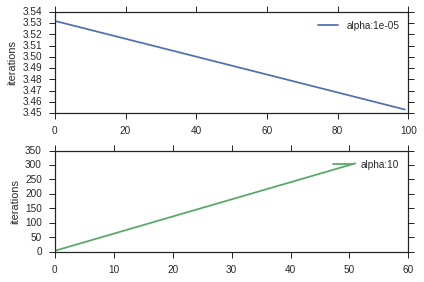

In [521]:
cc = sns.color_palette()
f,axes = plt.subplots(2,1)
axes[0].plot(range(numIterations),np.log10(cost_alpha10eneg5.flatten()),linestyle='-',label='alpha:1e-05',color=cc[0])
axes[1].plot(range(numIterations),np.log10(cost_alpha10.flatten()),linestyle='-',label='alpha:10',color=cc[1])
for ax in axes:
    ax.set_ylabel('log10(cost)')
    ax.set_ylabel('iterations')
    ax.legend()
f.tight_layout()
plt.show()
plt.close()

When Alpha is very large, the cost function does not converge, but it does decrease for alpha of 1e-05. 

#### 2c

In [522]:
#2C
mincosts = []
costs = []
numIterations=5000
numiters_plot=100
x = np.matrix([np.ones(anscombe_dataset1.shape[0]),anscombe_dataset1[0].values]).T
y = anscombe_dataset1[1].values
testalphas = [10**(j) for j in range(-5,2)]
for alpha in testalphas:
    theta,cost_iter = gradient_descent(x, y,lambda1, lambda2,alpha, numIterations)
    costs.append(cost_iter)
    mincosts.append(min(cost_iter))

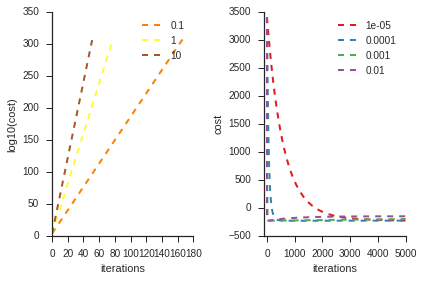

In [576]:
labels = [str(alp) for alp in testalphas]
cc = sns.color_palette("Set1",n_colors=len(labels))
f,axes = plt.subplots(1,2)
for i,th in enumerate(costs):
    if float(labels[i]) >= 0.1:
        ax = axes[0]
        ax.plot(range(len(th)),np.log10(th),'--',label=labels[i],color=cc[i],lw=2)
        ax.set_ylabel('log10(cost)')
    else:
        ax = axes[1]
        ax.plot(range(len(th)),th,'--',label=labels[i],color=cc[i],lw=2)
        ax.set_ylabel('cost')
        ax.set_xlim([-100,5000])
    ax.set_xlabel('iterations')
    ax.legend()
f.tight_layout()
sns.despine()
plt.show()
plt.close()

In [571]:
#Min costs
for i,x in enumerate(costs[:3]):
    seriesv = pd.Series(x.flatten(),index=range(5000))
    print labels[i],x.min(),seriesv[seriesv<=x.min()].index.min(), seriesv[seriesv<=x.min()].index.shape

1e-05 -226.812864262 4999 (1,)
0.0001 -231.870963867 939 (1,)
0.001 -231.903192853 90 (1,)


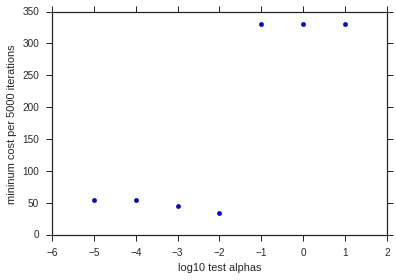

In [519]:
#Plot min cost versus alpha
plt.scatter(np.log10(testalphas),mincosts)
plt.xlabel('log10 test alphas')
plt.ylabel('mininum cost per 5000 iterations')

The best learning alpha is 10e-2 to 10e-3 because these alphas converges in less iterations than all other alphas.

### 3

In [65]:
datasets = [(0, 1), (2, 3), (4, 5), (6, 7)]
anscombe_x = anscombe[[x[0] for x in datasets]]
anscombe_y = anscombe[[x[1] for x in datasets]]

#### 3a

In [312]:
def perform_loo_anscombe(anscombef):
    anscombe = pd.read_csv(anscombef,sep='\t',header=None,index_col=None)
    datasets = [(0, 1), (2, 3), (4, 5), (6, 7)]
    datasets_params = []
    for x,y in datasets:
        anscombe_x = anscombe[x]
        anscombe_y = anscombe[y]
        loo = model_selection.LeaveOneOut()
        for train_index, test_index in loo.split(anscombe_x):
            train_x = anscombe_x.iloc[train_index]
            train_y = anscombe_y.iloc[train_index]
            test_x = anscombe_x.iloc[test_index]
            test_y = anscombe_y.iloc[test_index]
            mod = linear_model.LinearRegression()
            mod = mod.fit(train_x.values.reshape(-1,1),train_y.values.reshape(-1,1))
            pred = mod.predict(test_x.values.reshape(-1,1))
            mse = metrics.mean_squared_error(test_y,pred)
            residual = (pred[0]-test_y).values[0]
            datasets_params.append([x,y,mod.coef_[0][0],mod.intercept_[0],mse,residual,pred])
    datasets_params = pd.DataFrame(datasets_params,columns=['dataset_x','dataset_y','coef','intercept','mse','residual','fittedval'])
    return(datasets_params)

In [317]:
#3A
datasets_params_ansc = perform_loo_anscombe(anscombef)

#### 3b

Bootstrap results and residuals for each model trained in LOO

In [309]:
#B
import statsmodels.api as sm
import scipy.stats as stats

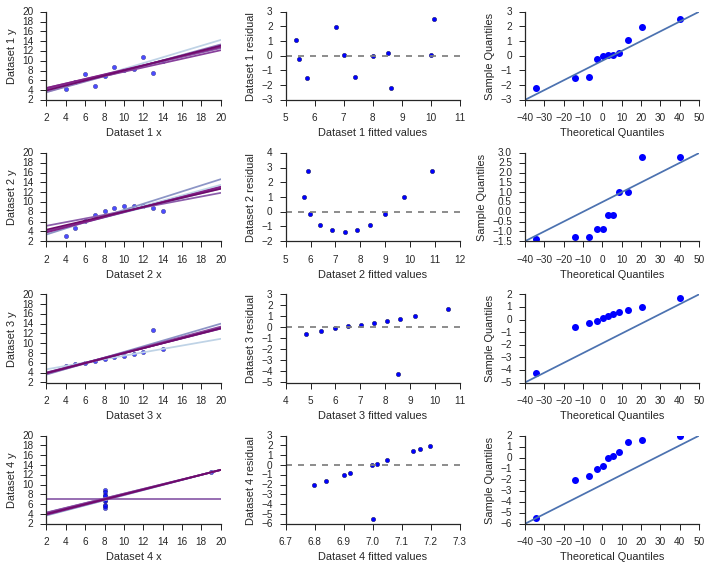

In [333]:
#B
f,axes = plt.subplots(4,3,figsize=(10,8))
i=0
j=0
datasetnum = 1
itermods = 0
cc = sns.color_palette("BuPu",n_colors=anscombe.shape[0])
for k,grp in datasets_params_ansc.groupby(['dataset_x','dataset_y']):
    ax = axes[i][j]
    ax.scatter(anscombe[k[0]],anscombe[k[1]],s=20,alpha=0.7)
    for ind in grp.index:
        ax.plot(np.linspace(2,20),[grp.loc[ind,'coef']*x+grp.loc[ind,'intercept'] for x in np.linspace(2,20)],color=cc[itermods],label='training:{}'.format(itermods+1))
        itermods = itermods+1
    ax.set_xlabel('Dataset {} x'.format(datasetnum))
    ax.set_ylabel('Dataset {} y'.format(datasetnum))
    ax.set_xlim([2,20])
    ax.set_ylim([2,20])
    ax = axes[i][j+1]
    ax.scatter(grp['fittedval'],grp['residual'])
    ax.axhline(0,ls='--',color='gray')
    ax.set_xlabel('Dataset {} fitted values'.format(datasetnum))
    ax.set_ylabel('Dataset {} residual'.format(datasetnum))
    datasetnum = datasetnum+1
    ax2 = axes[i][j+2]
    sm.qqplot(grp['residual'], stats.t, distargs=(1,), loc=3, scale=10,ax=ax2)
    ax2.plot([0,1],[0,1],transform=ax2.transAxes)
    i= i+1
    itermods=0
f.tight_layout()
sns.despine()
plt.show()
plt.close()    

Dataset 1 is the only dataset that does not violate the assumptions of linear regression. It's residuals are normally distributed, as visualized by the QQplot. The bootstrap results are consistent for all models. <br>Dataset2 linear models are also similar but they consistently miss the last couple of points. Thus, dataset 2 has skewed residuals and not following normal distribution. This is because the last couple of points of this dataset seem to follow a more complicated model. <br>Dataset 3 bootstrapped models vary due to the outlier which skews the residuals, as visualized in the qqplot. <br> Dataset 4 really violates all assumptions. The various leave one out creates linear fits when the outlier is included, but when the outlier isn't included the lines are flat, instead of a linear. The residuals are somehwat skewed as well, and not perfectly normal, as visualized by the qqplot.
<br> All datasets are relatively small with 11 examples, which may violate asymptotic limits of the centeral limit theorum. 

### 4

In [5]:
import scipy.io as sio
parkinsons_f = 'ml_stuff/parkinsons.mat'
parkinsons_mat = sio.loadmat(parkinsons_f)

#### 4b,c

In [6]:
parkinsons_x = parkinsons_mat['X']
parkinsons_y = parkinsons_mat['y'].T

In [9]:
regs2test = np.logspace(-10.0, 10, num=100)

In [579]:
regs2test = np.logspace(-10.0, 10, num=100)
coef_alphs = collections.defaultdict(list)
mod_obs = ['Ridge','Lasso']
sum_residuals = collections.defaultdict(list)
for regtyp in mod_obs:
    for reg in regs2test:
        if regtyp=='Ridge':
            mod = linear_model.Ridge(alpha=reg,fit_intercept=True)
        else:
            mod = linear_model.Lasso(alpha=reg,fit_intercept=True)
        mod.fit(parkinsons_x,parkinsons_y)
        ypred = mod.predict(parkinsons_x)
        resid = (ypred - parkinsons_y.flatten())
        coefs = mod.coef_
        coef_alphs[regtyp].append(coefs)
        sum_residuals[regtyp].append(resid)

In [585]:
len(sum_residuals[regtype])

100

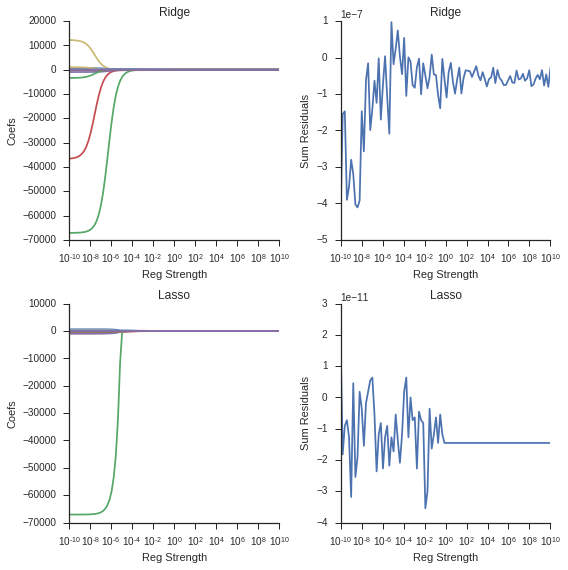

In [588]:
f,axes = plt.subplots(2,2,figsize=(8,8))
j=0
for i,regtype in enumerate(mod_obs):
    for j in [0,1]:
        ax = axes[i][j]
        coefs = coef_alphs[regtype]
        resid = sum_residuals[regtype]
        if j == 0:
            if regtype == 'Ridge':
                ax.plot(regs2test, [x[0] for x in coefs])
                ax.set_ylabel('Coefs')
            else:
                ax.plot(regs2test, coefs)
                ax.set_ylabel('Coefs')
        if j == 1:
            ax.plot(regs2test, [x.sum() for x in resid])
            ax.set_ylabel('Sum Residuals')
        ax.set_xscale('log')
        ax.set_xlabel('Reg Strength')
        ax.set_title(regtype)
f.tight_layout()
sns.despine()
plt.show()
plt.close()

In [11]:
parkinsons_xdf_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.496026,-0.310777,0.953423,0.357449,0.954884,-0.222823,-0.270611,0.029418,-0.432116,-0.717604,0.029423,-0.361004,-0.011446,-1.474960,-1.541581,-0.798931
1,-1.134865,-1.536832,-1.024135,-1.163211,-1.028765,-0.678242,-0.756548,-0.601417,-0.789798,-0.685800,-0.601415,-0.688964,1.575230,-1.297725,-1.318152,-1.430134
2,-0.162110,-0.867987,-0.240686,-0.498865,-0.237880,-1.042108,-0.735010,-1.119428,-1.218021,-0.976051,-1.119429,0.091573,0.391306,-0.996370,-1.601299,-0.190567
3,0.029993,-0.730901,-0.366578,-0.014355,-0.366670,-0.424967,0.411465,-0.419022,-0.493344,-0.389103,-0.419535,0.508401,0.791482,-0.719420,-1.138178,1.299124
4,-0.907488,-1.222302,-1.647399,-1.454027,-1.653954,-1.010236,-0.789310,-1.252486,-1.046186,-0.539461,-1.253326,-0.630119,1.272666,-0.889698,-1.366664,-0.391371


#### 3D

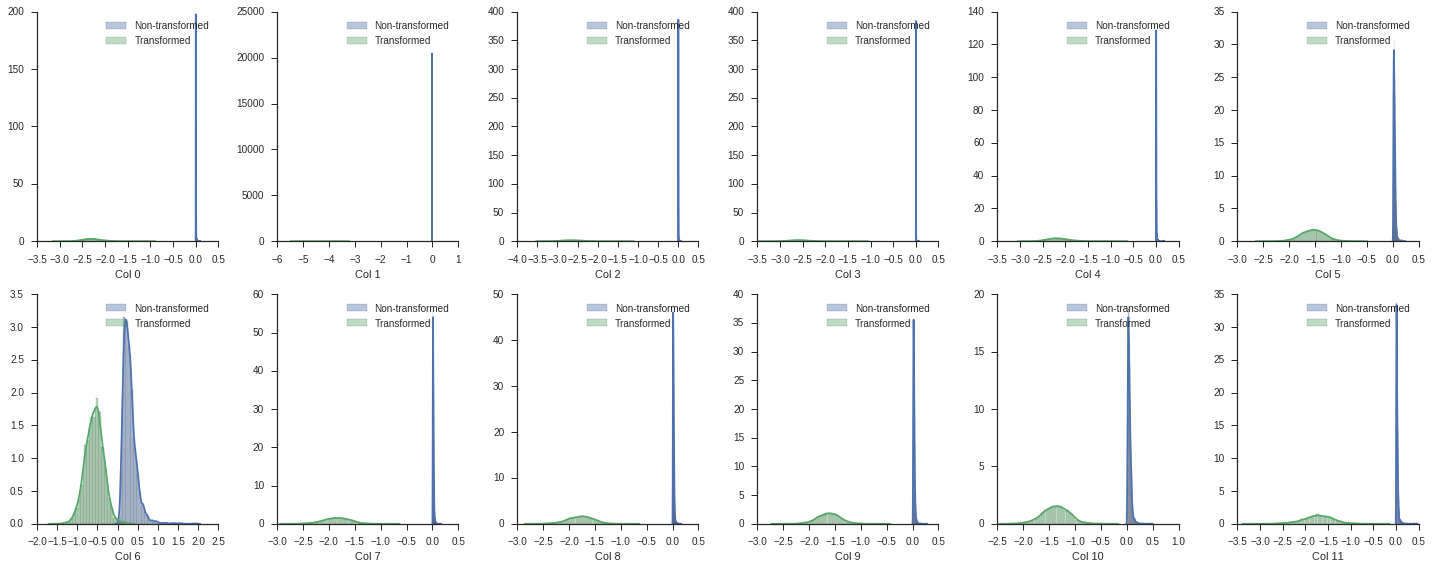

In [244]:
#Plotting the non-transformed and transformed
f,axes = plt.subplots(2,6,figsize=(20,8))
i = 0
j = 0
for ind in xrange(12):
    if j == 6:
        i = 1
        j = 0
    logt = np.log10(parkinsons_x[:,ind])
    ax = axes[i][j]
    ax = sns.distplot(parkinsons_x[:,ind],ax=ax,label='Non-transformed')
    sns.distplot(logt,ax=ax,label='Transformed')
    ax.legend()
    ax.set_xlabel('Col {}'.format(ind))
    j = j+1
sns.despine()
f.tight_layout()
plt.show()
plt.close()

In [7]:
#Standardize data
parkinsons_xdf = pd.DataFrame(parkinsons_x)
parkinsons_xdf_standardized = pd.concat([parkinsons_xdf[range(0,12)].applymap(lambda x: np.log10(x)).apply(lambda x: (x-x.mean())/x.std()),
                                         parkinsons_xdf[range(12,16)].apply(lambda x: (x-x.mean())/x.std())],axis=1)
parkinsons_y_standardized = (parkinsons_y-parkinsons_y.mean())/parkinsons_y.std()

#### 3E,F

In [590]:
regs2test = np.logspace(-10.0, 10, num=100)
coef_alphs_s = collections.defaultdict(list)
sum_residuals_s = collections.defaultdict(list)
mod_obs = ['Ridge','Lasso']
for regtyp in mod_obs:
    for reg in regs2test:
        if regtyp=='Ridge':
            mod = linear_model.Ridge(alpha=reg,fit_intercept=True,)
        else:
            mod = linear_model.Lasso(alpha=reg,fit_intercept=True)
        mod.fit(parkinsons_xdf_standardized,parkinsons_y_standardized)
        ypred = mod.predict(parkinsons_xdf_standardized)
        resid = (ypred - parkinsons_y_standardized.flatten())
        coefs = mod.coef_
        coef_alphs_s[regtyp].append(coefs)
        sum_residuals_s[regtyp].append(resid)

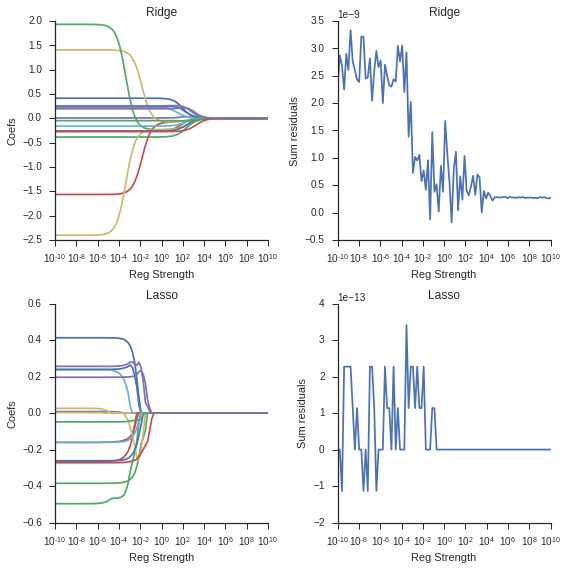

In [591]:
f,axes = plt.subplots(2,2,figsize=(8,8))
j=0
for i,regtype in enumerate(mod_obs):
    for j in [0,1]:
        ax = axes[i][j]
        coefs = coef_alphs_s[regtype]
        resid = sum_residuals_s[regtype]
        if j == 0:
            if regtype == 'Ridge':
                ax.plot(regs2test, [x[0] for x in coefs])
                ax.set_ylabel('Coefs')
            else:
                ax.plot(regs2test, coefs)
                ax.set_ylabel('Coefs')
        if j == 1:
            ax.plot(regs2test, [x.sum() for x in resid])
            ax.set_ylabel('Sum residuals')
        ax.set_xscale('log')
        ax.set_xlabel('Reg Strength')
        ax.set_title(regtype)
f.tight_layout()
sns.despine()
plt.show()
plt.close()

The differences between L1 and L2 regularization is that L1 causes the coefficients to be zeroed out faster when we increase regularization strength. L2 regularization does not zero out coefficients until much larger regularization strengths than L1. Similarly the sum of the residuals (predicted-actual) at every regularization strength for L1 and L2 are very close to zero. This is most likely because it is overfitting as I did not create test set (didn't ask me to so I didn't do it). For ridge, this stabalizes at zero for the nonstandardized data more so for L2 than L1, probably due to the fact that L2 keeps as many correlated variables where as L1 tends to only choose one. <br><br>After standardizing the data, the coefficients have a much more spread out behavior in the traces when compared to the non-standardized data, thus the coefficients have more variance. Also, it causes the coefficients to converge to zero at much higher regularization strengths than the nonstandardized.The sum-residuals is also very close to zero (again, probably overfit). In this case L1 (lasso) converges very near 0 and L1=1. L2 tends to move to zero at higher regularization strengths. At both solutions, the error is pretty much zero anyhow as its raised to the negative power.

## Kmeans

In [419]:
import copy
def relabel(y_true, y_predict):
    
    y_true = y_true.astype('int')
    y_predict = y_predict.astype('int')
    
    # precision / recall
    # precision if a=true, recall if a=predict
def pr(a, b):
    return 1.0*np.sum(a==b)/a.size
    
    # f1 score
def fscore(truetrue, guess):
    f1score = np.zeros(np.unique(truetrue).size)
    for i in range(f1score.size):
        index_true = np.where(truetrue==i)[0]
        index_guess = np.where(guess==i)[0]
        p = pr(truetrue[index_true], guess[index_true])
        r = pr(guess[index_guess], truetrue[index_guess])
        if r+p >0:
            f1score[i] = 2*p*r/(p+r)

    return f1score

def return_ylabel(y_true,y_predict,numIters = 1000):
    y_relabel = copy.deepcopy(y_predict)
    for num in range(numIters):
        # picks the worse label
        f = fscore(y_true,y_relabel)   
        index = np.where(f==np.min(f))[0]
        if index.size > 1:
            index = np.random.choice(index,1)
        index = index.item()
        
        # finds a proposal swap
        bincount = np.bincount(y_relabel[index*10:(index+1)*10])
        new = np.where(bincount==np.max(bincount))[0]
        if new.size > 1:
            new = np.random.choice(new,1)
            
        # perform the swap
        yr = copy.deepcopy(y_relabel)
        yr[y_relabel==new] = index
        yr[y_relabel==index] = new
        f_new = fscore(y_true, yr)
        
        # if new swap improves f1 score, keep the swap
        if np.sum(f_new) > np.sum(f):
            y_relabel = yr
    
    return y_relabel

### 1

In [343]:
from sklearn import cluster

#### 1A

In [340]:
mnis_data_f = 'ml_stuff/mnist_data.txt'
mnis_labels_f = 'ml_stuff/mnist_label.txt'
mnis_data = pd.read_csv(mnis_data_f,sep=' ',header=None,index_col=None)
mnis_labels = pd.read_csv(mnis_labels_f,sep=' ',header=None,index_col=None)
mnis_labels = mnis_labels.astype(float)

In [390]:
kclusters = 10
random_state = 170
y_pred = cluster.KMeans(n_clusters=kclusters, random_state=random_state,n_init=100).fit_predict(mnis_data)

In [420]:
relabel_y = return_ylabel(mnis_labels.values.flatten(),y_pred,numIters = 1000)

In [395]:
def bench_k_means(data,labels,labels_predicited):
    metrics_all = [ metrics.homogeneity_score(labels, labels_predicited),
     metrics.completeness_score(labels, labels_predicited),
     metrics.v_measure_score(labels, labels_predicited),
     metrics.adjusted_rand_score(labels, labels_predicited),
     metrics.adjusted_mutual_info_score(labels,  labels_predicited),
     metrics.silhouette_score(data, labels_predicited,
                              metric='euclidean',
                              sample_size=mnis_data.shape[0]),
                  metrics.accuracy_score(labels,y_pred)]
    metrics_all = pd.DataFrame(metrics_all).T
    metrics_all.columns=['Homogeneity_score','Completeness_score','vmeasure_score,','adjRand_score',
                                               'adjMutualinfo_score','Silhouette_score','accuracy']
    return(metrics_all)

Testing the output of functions

In [396]:
metrics_km = bench_k_means(mnis_data,mnis_labels.values.flatten(),relabel_y)

In [424]:
precision_recall_km = metrics.precision_recall_fscore_support(mnis_labels.values.flatten(),relabel_y,average=None,labels=np.unique(relabel_y))
precision_recall_km = pd.DataFrame(list(precision_recall_km),columns=np.unique(y_pred),index=['Precision','Recall','fbeta_score','support'])

In [425]:
metrics_km

,Homogeneity_score,Completeness_score,"vmeasure_score,",adjRand_score,adjMutualinfo_score,Silhouette_score,accuracy
0,0.567126,0.597454,0.581895,0.340197,0.455458,0.093747,0.16


In [426]:
precision_recall_km

,0,1,2,3,4,5,6,7,8,9
Precision,0.800000,0.357143,0.400000,0.666667,1.000000,0.0,0.833333,0.294118,1.0,0.055556
Recall,0.400000,0.500000,0.200000,0.600000,0.500000,0.0,1.000000,0.500000,1.0,0.100000
fbeta_score,0.533333,0.416667,0.266667,0.631579,0.666667,0.0,0.909091,0.370370,1.0,0.071429
support,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.0,10.000000


Reading the documentation it appears that the best of n_inits is returned by sklearn.cluster.KMeans, So I am writing a for loop to specifically address the question "does the accuracy precision or recall change significantly between initializations". The function itself always returns the best, so I don't know why we don't write a for loop to address this question.

#### 1A

In [448]:
concat_init_scorings = []
concat_precision_recalls = []
kclusters = 10
random_state = 170
for init_n in range(1,101):
    y_pred = cluster.KMeans(n_clusters=kclusters, random_state=random_state,n_init=init_n).fit_predict(mnis_data)
    relabel_y = return_ylabel(mnis_labels.values.flatten(),y_pred,numIters = 1000)
    metrics_km = bench_k_means(mnis_data,mnis_labels.values.flatten(),relabel_y)
    metrics_km.index = ['init {}'.format(init_n)]
    precision_recall_km = metrics.precision_recall_fscore_support(mnis_labels.values.flatten(),relabel_y,average=None,labels=np.unique(relabel_y))
    precision_recall_km = pd.DataFrame(list(precision_recall_km[:2])).T
    precision_recall_km.columns = ['Precision','Recall']
    precision_recall_km['Cluster'] = precision_recall_km.index
    precision_recall_km['n_init'] = init_n
    concat_init_scorings.append(metrics_km)
    concat_precision_recalls.append(precision_recall_km)

In [449]:
ninit_scorings = pd.concat(concat_init_scorings)
ninit_precision_recalls = pd.concat(concat_precision_recalls)

In [450]:
ninit_precision_recalls.head()

,Precision,Recall,Cluster,n_init
0,1.000000,0.5,0,1
1,0.333333,0.6,1,1
2,0.142857,0.1,2,1
3,0.636364,0.7,3,1
4,0.666667,0.2,4,1


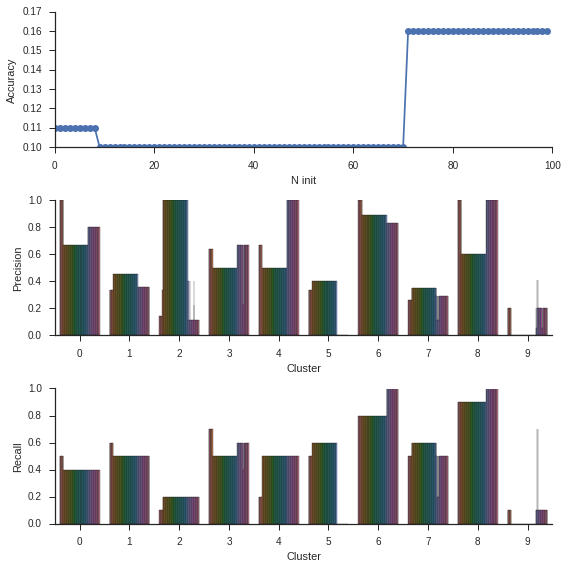

In [457]:
f,axes = plt.subplots(3,1,figsize=(8,8))
axes[0].plot(range(ninit_scorings.shape[0]),ninit_scorings['accuracy'],'-o')
axes[0].set_xlabel('N init')
axes[0].set_ylabel('Accuracy')
ax = sns.barplot(x=ninit_precision_recalls['Cluster'],y=ninit_precision_recalls['Precision'],hue=ninit_precision_recalls['n_init'],
                 hue_order = range(1,101),ax=axes[1])
ax.legend_.remove()
ax.set_ylabel('Precision')
ax = sns.barplot(x=ninit_precision_recalls['Cluster'],y=ninit_precision_recalls['Recall'],hue=ninit_precision_recalls['n_init'],
                 hue_order = range(1,101),ax=axes[2])
ax.legend_.remove()
ax.set_ylabel('Recall')
f.tight_layout()
sns.despine()
plt.show()
plt.close()

The following plots show the accuracy for n_inits from 1 to 100. The precision and recall plots show the precision and recall for each digit. Bar colors indicates the n_init used to train, from n_init = 1 to n_init=100. The accuracy is 0.11 for low n_inits, and it drops to 0.10 to n_inits to ~70. After 70 n_inits the accuracy increases to 0.16. So different n_inits do affect the accuracy with higher n_inits performing better. Similarly precision and recall also vary for each cluster along different n_inits. Higher n_inits generally perform better, with the exception of some clusters. Similarly, recall is very similar amongst different n_inits, where higher n_inits generally perform better for some clusters. Overall, varying n_init does somewhat change the accuracy, precision and recall. 

#### 1B

Inertia represents the cost of Kmeans according to the documentation of sklearn.Cluster.Kmeans

In [594]:
inertia_all= []
init_n=10
for kclusters in xrange(1,101):
    ttmod = cluster.KMeans(n_clusters=kclusters, random_state=random_state,n_init=init_n).fit(mnis_data)
    inertia = ttmod.inertia_
    inertia_all.append(inertia)

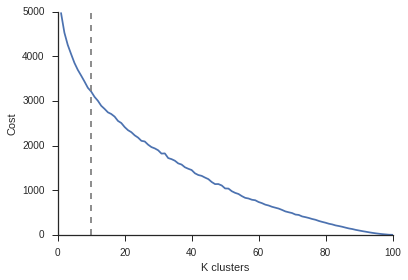

In [595]:
plt.plot(range(1,101),inertia_all)
plt.xlabel('K clusters')
plt.ylabel('Cost')
plt.axvline(10,ls='--',color='gray')
sns.despine()
plt.show()
plt.close()

There isn't a clear elbow for K_cluster vs the cost of K clusters. At 10, it still seems the cost shrinks while increasing K. If I didn't know there was 10 digits, I might think somehting like 80 would be the right K, cause after 80, it seem to decrease as quickly anymore from 80 to 100. 